### COVID_19 PREDICTION USING MACHINE LEARNING TECHNIQUES FOR A COUNTY IN THE UNITED STATES 

#### DONE BY, 
#### MERIN JOSEPH, TIANHAO SHEN, RUILING WANG

###### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import ensemble
from sklearn.model_selection import cross_validate

###### Load the dataset into 'df'

In [2]:
df = pd.read_csv(r'C:\Users\CSUFTitan\OneDrive - Cal State Fullerton\Classes\2022 Spring\CPSC 483 Machine Learning\Project\new dataset\covid19cases_test.csv')

In [3]:
df.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests,positive_tests
0,2/1/2020,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0,0.0,0.0,0.0,0.0,NaN,0.0
1,2/2/2020,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0,0.0,0.0,0.0,0.0,NaN,0.0
2,2/3/2020,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0,0.0,0.0,0.0,0.0,NaN,0.0
3,2/4/2020,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0,0.0,0.0,0.0,0.0,NaN,0.0
4,2/5/2020,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0,0.0,0.0,0.0,0.0,NaN,0.0


###### Data preprocessing
1.convert 'date; into a datetime object

In [4]:
df['head']=pd.to_datetime(df['date'])

2.Encode the labels int int/float types

In [5]:
lenc = LabelEncoder()
def labelencoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            lenc.fit(df[c].astype(str))
            df[c] = lenc.transform(df[c].astype(str))
    return df

In [6]:
df=labelencoder(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49532 entries, 0 to 49531
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        49532 non-null  int32         
 1   area                        49532 non-null  int32         
 2   area_type                   49532 non-null  int32         
 3   population                  47908 non-null  float64       
 4   cases                       48720 non-null  float64       
 5   cumulative_cases            48720 non-null  float64       
 6   deaths                      48720 non-null  float64       
 7   cumulative_deaths           48720 non-null  float64       
 8   total_tests                 49471 non-null  float64       
 9   cumulative_total_tests      49532 non-null  int64         
 10  cumulative_positive_tests   49532 non-null  int64         
 11  reported_cases              48720 non-null  float64   

View the null values

In [8]:
df.isnull().sum()

date                              0
area                              0
area_type                         0
population                     1624
cases                           812
cumulative_cases                812
deaths                          812
cumulative_deaths               812
total_tests                      61
cumulative_total_tests            0
cumulative_positive_tests         0
reported_cases                  812
cumulative_reported_cases       812
reported_deaths                 812
cumulative_reported_deaths      812
reported_tests                11346
positive_tests                   61
head                             47
dtype: int64

3.Fill the missing values using mode

In [9]:
for i in ['population', 'cases', 'cumulative_cases', 'deaths', 'cumulative_deaths', 'total_tests', 'reported_cases', 'cumulative_reported_cases', 'reported_deaths', 'cumulative_reported_deaths', 'reported_tests', 'positive_tests', 'head']:
    df[i] = df[i].fillna(df[i].mode()[0])

In [10]:
df.isnull().sum()

date                          0
area                          0
area_type                     0
population                    0
cases                         0
cumulative_cases              0
deaths                        0
cumulative_deaths             0
total_tests                   0
cumulative_total_tests        0
cumulative_positive_tests     0
reported_cases                0
cumulative_reported_cases     0
reported_deaths               0
cumulative_reported_deaths    0
reported_tests                0
positive_tests                0
head                          0
dtype: int64

View the correlation of the features

In [11]:
df.corr()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests,positive_tests
date,1.000000,0.000523,-0.000181,-0.000157,-0.080578,-0.034947,-0.065600,-0.023800,-0.047478,-0.035616,-0.034625,-0.065256,-0.033035,-0.045493,-0.020100,-0.039076,-0.079671
area,0.000523,1.000000,-0.183309,-0.187013,-0.085200,-0.143018,-0.115435,-0.155440,-0.143657,-0.141334,-0.142426,-0.067662,-0.142227,-0.110034,-0.154041,-0.110400,-0.084881
area_type,-0.000181,-0.183309,1.000000,0.960497,0.429197,0.718971,0.568752,0.758205,0.701452,0.699142,0.709462,0.340884,0.715184,0.542142,0.748005,0.533773,0.425380
population,-0.000157,-0.187013,0.960497,1.000000,0.453006,0.759193,0.604675,0.810021,0.749715,0.742409,0.751707,0.359793,0.755251,0.576384,0.800427,0.573788,0.449599
cases,-0.080578,-0.085200,0.429197,0.453006,1.000000,0.480196,0.560540,0.461997,0.722032,0.477383,0.473467,0.649308,0.459275,0.371187,0.451960,0.439113,0.996342
cumulative_cases,-0.034947,-0.143018,0.718971,0.759193,0.480196,1.000000,0.474171,0.974000,0.796820,0.988701,0.999704,0.404318,0.999644,0.497377,0.974000,0.628897,0.492139
deaths,-0.065600,-0.115435,0.568752,0.604675,0.560540,0.474171,1.000000,0.490921,0.611215,0.420249,0.463913,0.477877,0.462123,0.757045,0.452927,0.479683,0.560996
cumulative_deaths,-0.023800,-0.155440,0.758205,0.810021,0.461997,0.974000,0.490921,1.000000,0.820089,0.968017,0.971413,0.376835,0.973862,0.521240,0.998607,0.639961,0.469949
total_tests,-0.047478,-0.143657,0.701452,0.749715,0.722032,0.796820,0.611215,0.820089,1.000000,0.800046,0.791939,0.486212,0.788028,0.537160,0.812272,0.583166,0.734596
cumulative_total_tests,-0.035616,-0.141334,0.699142,0.742409,0.477383,0.988701,0.420249,0.968017,0.800046,1.000000,0.989513,0.390417,0.988626,0.440293,0.972561,0.628828,0.486262


<AxesSubplot:>

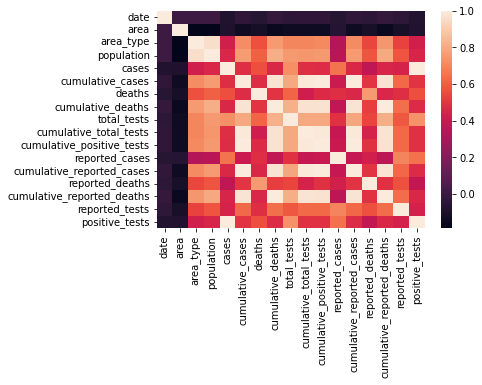

In [12]:
sns.heatmap(df.corr())

Viewing the relation between target feature 'cases' and every other features by plotting a scatter plot

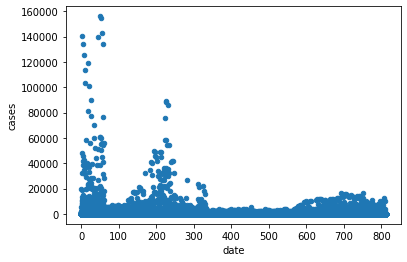

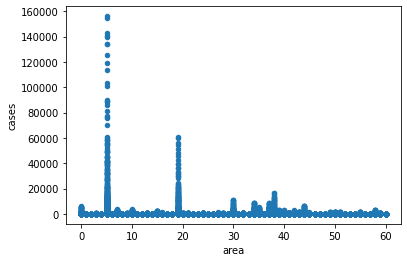

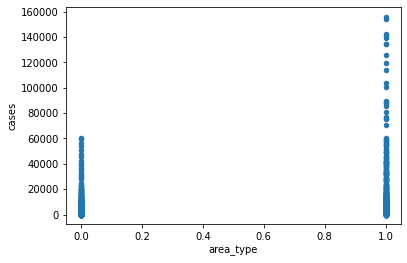

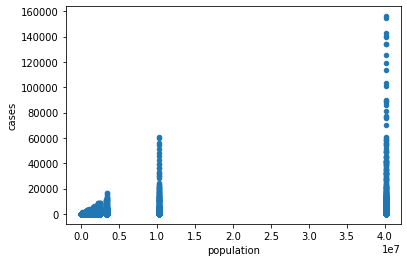

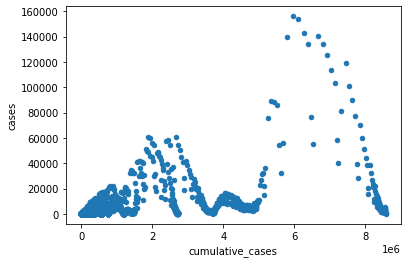

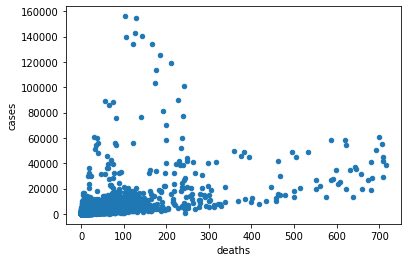

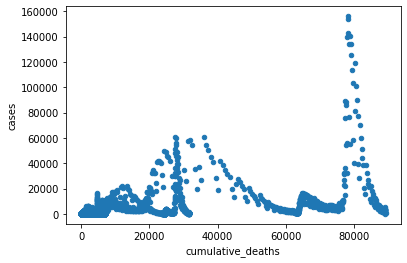

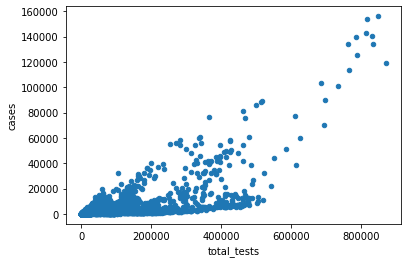

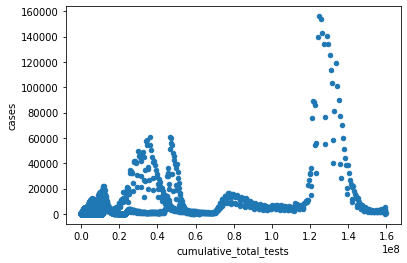

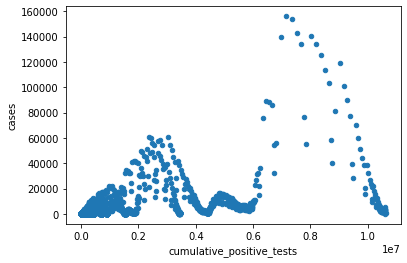

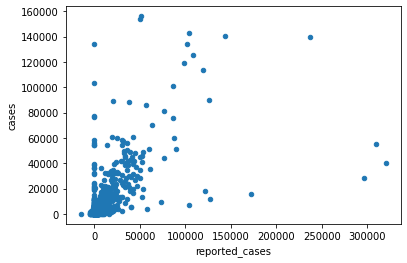

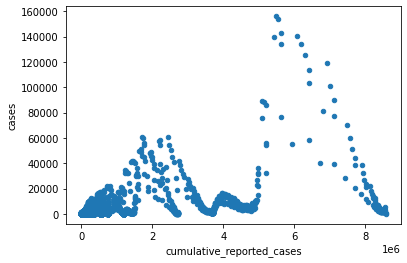

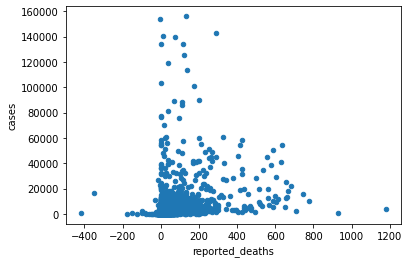

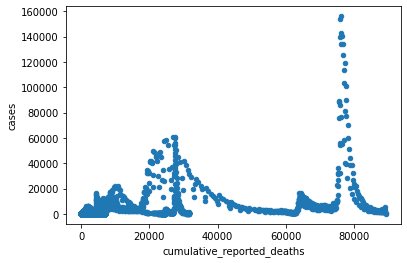

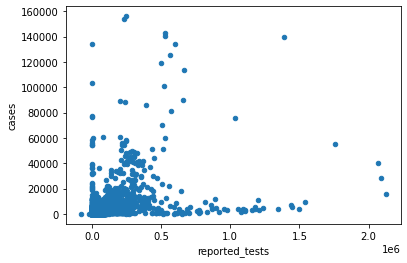

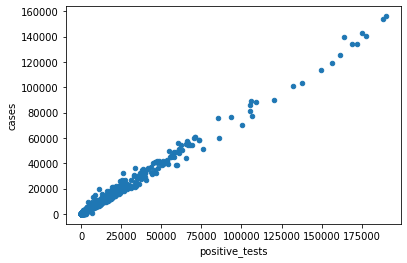

In [13]:
for i in ['date', 'area', 'area_type', 'population', 'cumulative_cases', 'deaths', 'cumulative_deaths', 'total_tests', 'cumulative_total_tests', 'cumulative_positive_tests', 'reported_cases', 'cumulative_reported_cases', 'reported_deaths', 'cumulative_reported_deaths', 'reported_tests', 'positive_tests' ]:
    df.plot(kind='scatter', x=i, y='cases')
    plt.show()

4.dropping some features that didnt have a strong correlation with the target value 'cases'

In [14]:
trans_df=df.drop(['area_type', 'population','cumulative_deaths', 'cumulative_total_tests', 'reported_deaths', 'cumulative_reported_deaths' ],axis=1)

In [15]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49532 entries, 0 to 49531
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       49532 non-null  int32         
 1   area                       49532 non-null  int32         
 2   cases                      49532 non-null  float64       
 3   cumulative_cases           49532 non-null  float64       
 4   deaths                     49532 non-null  float64       
 5   total_tests                49532 non-null  float64       
 6   cumulative_positive_tests  49532 non-null  int64         
 7   reported_cases             49532 non-null  float64       
 8   cumulative_reported_cases  49532 non-null  float64       
 9   reported_tests             49532 non-null  float64       
 10  positive_tests             49532 non-null  float64       
 11  head                       49532 non-null  datetime64[ns]
dtypes: d

moving the target feature 'cases' to be the last column in dataset

In [16]:
column_to_move = trans_df.pop("cases")
trans_df.insert(10, "cases", column_to_move)

In [17]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49532 entries, 0 to 49531
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       49532 non-null  int32         
 1   area                       49532 non-null  int32         
 2   cumulative_cases           49532 non-null  float64       
 3   deaths                     49532 non-null  float64       
 4   total_tests                49532 non-null  float64       
 5   cumulative_positive_tests  49532 non-null  int64         
 6   reported_cases             49532 non-null  float64       
 7   cumulative_reported_cases  49532 non-null  float64       
 8   reported_tests             49532 non-null  float64       
 9   positive_tests             49532 non-null  float64       
 10  cases                      49532 non-null  float64       
 11  head                       49532 non-null  datetime64[ns]
dtypes: d

defining dataset x with independent features and dataset y with the target/dependent feature

In [18]:
x = trans_df.iloc[ : , 0:10]
y = trans_df['cases']

In [19]:
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49532 entries, 0 to 49531
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       49532 non-null  int32  
 1   area                       49532 non-null  int32  
 2   cumulative_cases           49532 non-null  float64
 3   deaths                     49532 non-null  float64
 4   total_tests                49532 non-null  float64
 5   cumulative_positive_tests  49532 non-null  int64  
 6   reported_cases             49532 non-null  float64
 7   cumulative_reported_cases  49532 non-null  float64
 8   reported_tests             49532 non-null  float64
 9   positive_tests             49532 non-null  float64
dtypes: float64(7), int32(2), int64(1)
memory usage: 3.4 MB
<class 'pandas.core.series.Series'>
RangeIndex: 49532 entries, 0 to 49531
Series name: cases
Non-Null Count  Dtype  
--------------  -----  
49532 non-null  fl

###### Split the dataset into training dataset and testing dataset using train_test_split()

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

We are implementing 4 machine learning algorithms - Random Forest, Linear Regression, Bayesian Ridge regression, Gradient Boosting regression technique. 

In [21]:
algo_rf = RandomForestRegressor(max_depth=200, random_state=0)
algo_lr = LinearRegression()
algo_bayesian = linear_model.BayesianRidge()
algo_gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate =0.1, loss='squared_error')

###### Cross validation implementation:
implement cross validation for each algorithm chosen with cv=5. 'cv' is cross vaidation generator or an iterable with a default value of 5 if not set. It can also be set with any other integer value or by using CV splitter.
Print the accuracy or r2 value for each algorithm used along with its standard deviation
###### Evaluate - r2 value/accuracy and Standard Deviation
It is found that Gradient Boosting technique has the highest r2 value of 0.9934 or an accuracy of 99.34. It is followed by Bayesian Ridge regression and Linear Regression with an accuracy of 99.32. Random forest has comparatively the least r2 value of 0.989 

In [22]:
algorithms=[]
algorithms.append(("Linear Regression", algo_lr))
algorithms.append(("Random Forest", algo_rf))
algorithms.append(("Bayesian", algo_bayesian))
algorithms.append(("Boosting", algo_gbr))

algo_results = []
algo_names = []
for name, algo in algorithms:
    results = cross_val_score(algo, x_train, y_train, scoring='r2', cv=5)
    algo_results.append(results)
    algo_names.append(name)
    print (name, "accuracy :", results.mean(), "and standard deviation :", results.std())

Linear Regression accuracy : 0.9932016014203382 and standard deviation : 0.0015549523599429284
Random Forest accuracy : 0.9899923641457404 and standard deviation : 0.00531171811283017
Bayesian accuracy : 0.9932025193209437 and standard deviation : 0.001555336081946496
Boosting accuracy : 0.9933498292239056 and standard deviation : 0.0021133241789509636


###### train the model with each algorithm


###### Evaluation - find the root mean square value for each algorithm
It is found that the least root mean square value is for Gradient Boosting algorithm - 304.2. Followed by Bayesian ridge and linear regression with 318. Random forest has the highest error value comparatively - 353.5

In [23]:
for name, algo in algorithms:
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
    #rfcc = pd.DataFrame(y_pred)
    #rfcc.columns = ["Prediction_Confirmed"]
    print( name, ": RMSE -", RMSE)

Linear Regression : RMSE - 318.19080051612633
Random Forest : RMSE - 353.5431133713603
Bayesian : RMSE - 318.06441547579175
Boosting : RMSE - 295.9461576837756


###### Evaluation - for test data using r2 value/accuracy
In test data too, Gradient boosting regressor is the best performing algorithm compared to all the toher three algorithms used with a r2 value of 0.9931 or accuracy of 99.31. It is followed by Bayesian ridge and linear regression both with a r2 value of .9922. Random forest has the lowest r2 value on test data too with an r2 value of 0.9904.

In [24]:
for name, algo in algorithms:
    test_scores = algo.score(x_test,y_test)
    print ("score value of", name, " is:", test_scores)

score value of Linear Regression  is: 0.9922538115086026
score value of Random Forest  is: 0.9904369244596157
score value of Bayesian  is: 0.992259963841819
score value of Boosting  is: 0.9932990213559871


###### Visual comparison of the four algorithms used 

###### using boxplot() for each algorithm. 
It is observed from the above three evaluation metric used, that, Gradient Boosting regression technique has the highest accuracy, followed by linear regression and random forest (negligible variations in accuracy) in predciting the Covid-19 cases in a US county.

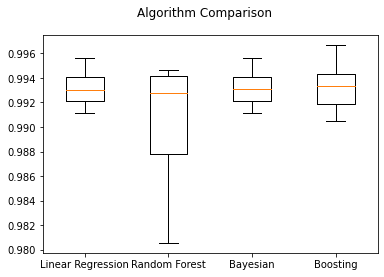

In [25]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(algo_results)
ax.set_xticklabels(algo_names)
plt.show()